In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

# Loading Data

To start to play with actigraphy data we have to load some data. 

We will start here loading some actigraphy data saved with ActStudio

The standard format is pretty simple. There is a header with the trial information that ends on a well defined pattern. We look to find that specific pattern so we can define how many lines should be ignored and then we use pandas to read the file as a standard csv file. 

In [2]:
def actigraphy_load_data(filename):
    f = open(filename, "r")
    count = 0
    while count < 50:
        count += 1

        # Get next line from file
        line = f.readline()
        if '+-------------------------------------------------------+' in line:
            break
    df = pd.read_csv(filename, delimiter = ';', header = count, parse_dates = False)
    df['DATE/TIME'] = pd.to_datetime(df['DATE/TIME'], format = '%d/%m/%Y %H:%M:%S')
    df.set_index( df['DATE/TIME'], inplace = True)
    return df    

## Let's load some data

In [3]:
filename = "Example_Log.txt"
url ='https://github.com/Condor-Instruments/actigraphy-tutorials-sample/blob/master/Example_Log.txt?raw=true'
urllib.request.urlretrieve(url, filename)

df = actigraphy_load_data(filename)

## Now we can plot it
We will be using plotly for the basics examples.

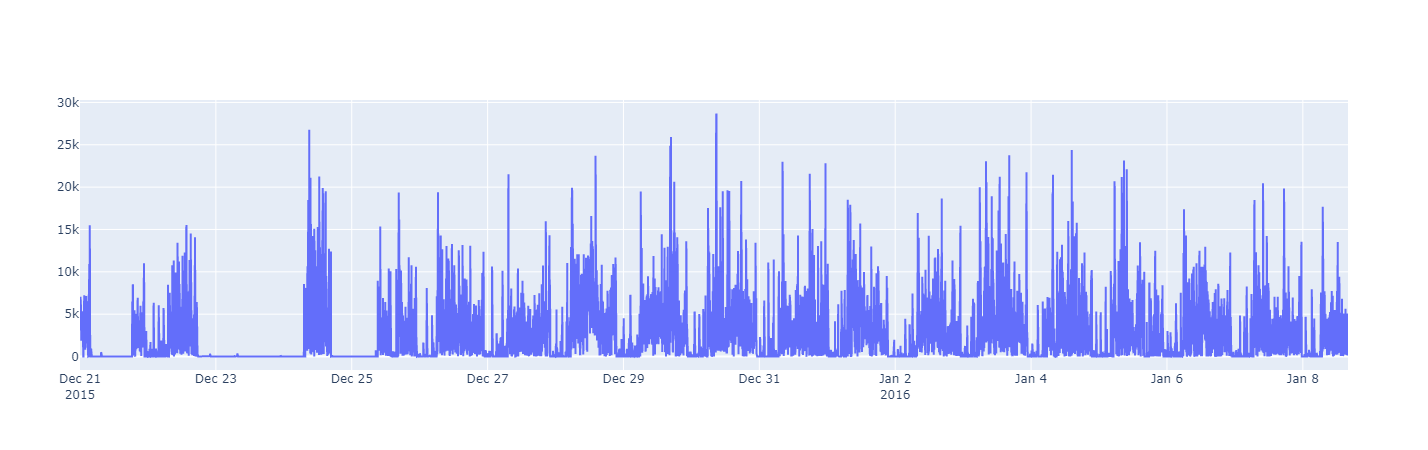

In [4]:
go.Figure(data=[go.Scatter(x=df['DATE/TIME'], y=df['PIM'])], layout=go.Layout())

You can also use the pandas plot interface. It is based on Matplotlib.

<AxesSubplot:xlabel='DATE/TIME'>

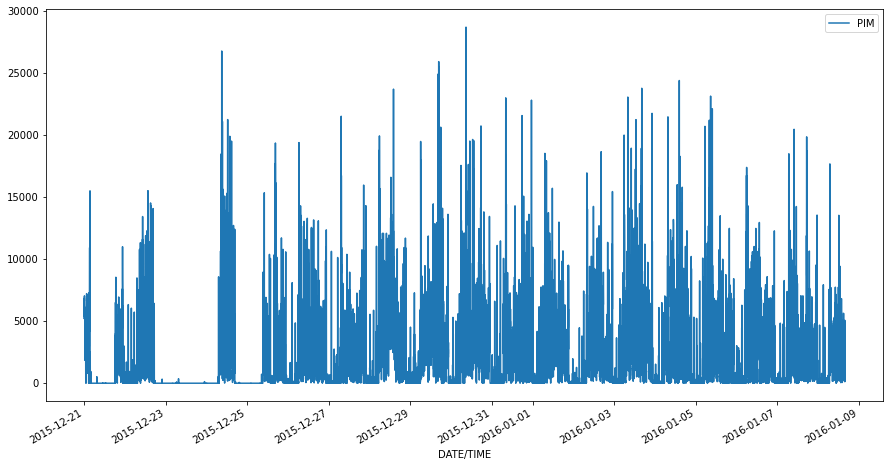

In [5]:
df.plot.line(x = 'DATE/TIME', y = 'PIM', figsize=(15,8))

Actigraphy, most of the time is composed by several sensors and not only activity derived from accelerometers. As an example we can visualize both temperature sensor and activity on the same plot.

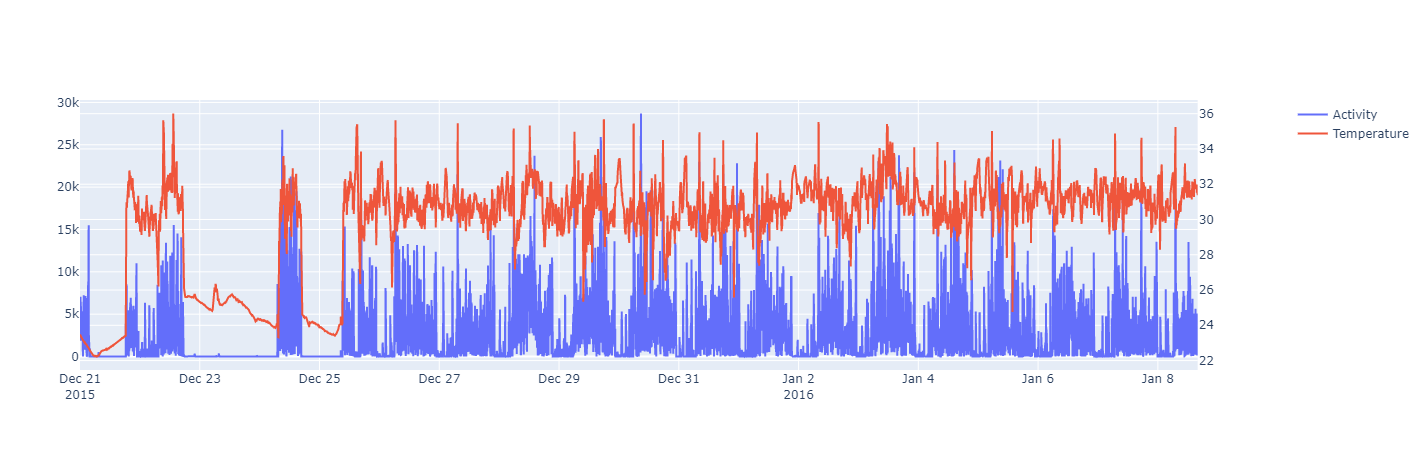

In [6]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df['DATE/TIME'], y=df['PIM'], name = 'Activity'), secondary_y=False)
fig.add_trace(go.Scatter(x=df['DATE/TIME'], y=df['TEMPERATURE'], name = 'Temperature'), secondary_y=True)

## Selecting a specific period

Most of the times, the data will contain some extra data on the beggining and on the end of the data that we want to remove. Getting the specific perid we want on python is quite simple. Pandas dataframe provides a simple interface for filtering data.

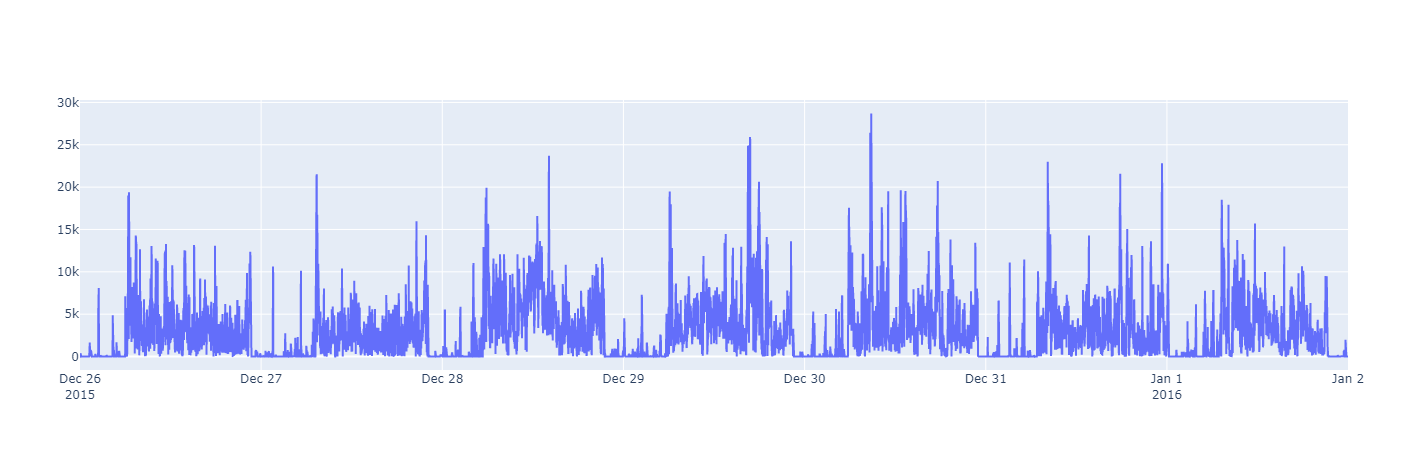

In [8]:
def actigraphy_select_period(start_date, end_date):
    index = np.logical_and(df['DATE/TIME'] >= start_date, df['DATE/TIME'] < end_date)
    filtered_df = df[index]
    return filtered_df


start_date = pd.Timestamp('2015-12-26 00:00:00')
end_date = start_date + pd.Timedelta(days= 7)
filtered_df = actigraphy_select_period(start_date, end_date)

go.Figure(data=[go.Scatter(x=filtered_df['DATE/TIME'], y=filtered_df['PIM'])], layout=go.Layout())